In [48]:
# imports
import matplotlib.pyplot as plt
import numpy as np
import ipywidgets as widgets
from IPython import display

from math import sqrt
from matplotlib import rcParams, cycler

# default Latex plotting style
CB_color_cycle = ['#377eb8', '#ff7f00', '#4daf4a',
                  '#f781bf', '#a65628', '#984ea3',
                  '#999999', '#e41a1c', '#dede00']
rcParams['axes.prop_cycle'] = cycler(color=CB_color_cycle)

# rc('text', usetex=True)
# rc('text.latex', preamble=r'\usepackage{gensymb}')

# fig_width_pt = 426.0  # Get this from LaTeX using \showthe\columnwidth result:
# inches_per_pt = 1.0 / 72.27  # Convert pt to inches
golden_mean = (sqrt(5) - 1.0) / 2.0  # Aesthetic ratio
fig_width = 10  # width in inches
fig_height = fig_width * golden_mean  # height in inches
fig_size = [fig_width, fig_height]

params = {'backend': 'Qt5Agg',
          'axes.labelsize': 8,
          'font.size': 8,
          'legend.fontsize': 8,
          'xtick.labelsize': 8,
          'ytick.labelsize': 8,
          'figure.figsize': fig_size}

rcParams.update(params)
rcParams["font.family"] = ["Latin Modern Roman"]
rcParams['path.simplify'] = True


In [70]:
# init canvas params
canv_size = widgets.IntSlider(min=512, max=2048, step=16, description='Canvas size:', value=1024)
display.display(canv_size)
xy_size = canv_size.value
img_mat = np.zeros((xy_size,xy_size), dtype=np.int64)
rng_gen = np.random.default_rng(seed=2000)

IntSlider(value=1024, description='Canvas size:', max=2048, min=512, step=16)

Button(description='Generate path', style=ButtonStyle())

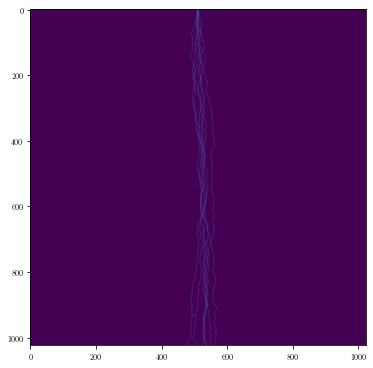

In [71]:
add_path_btn = widgets.Button(description='Generate path')
display.display(add_path_btn)

def add_path_btn_event(obj):
    display.clear_output(wait=True)
    display.display(add_path_btn)
    add_path()
    plt.imshow(img_mat)

def add_path():
    y_idx = xy_size//2
    bin_choice_vec = rng_gen.integers(low=-1, high=1, size=xy_size, endpoint=True)
    # map single random path
    for x_idx in range(xy_size):
        y_idx += bin_choice_vec[x_idx]
        if abs(y_idx) < xy_size:
            img_mat[x_idx, y_idx] += 1
        else:
            # skip
            pass
        
add_path_btn.on_click(add_path_btn_event)


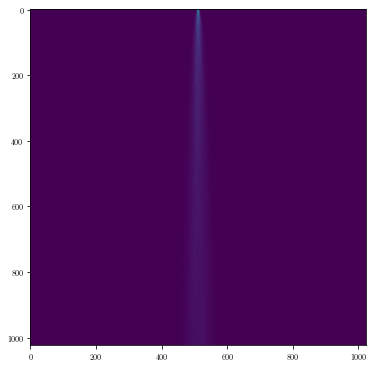

In [73]:
# generate lots of paths
reset_canvas(xy_size=xy_size, seed=1234)
n_ite = 1000
for ite_idx in range(n_ite):
    add_path()
plt.imshow(img_mat);


In [ ]:
# TODO: investigate how to generate fractal or Lichtenberg patterns
# improve the random character of the generator/plots